# Network structure

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

To read the network from a file, we use the command read_edgelist. 
Notice that the network format is the edge list and we consider the weighted version, because the file can have three columns (two for the connection and the third one for the weigth of the connections). In our case, we ignore the third connection, because we are considering only unweighted networks.

In [2]:
G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

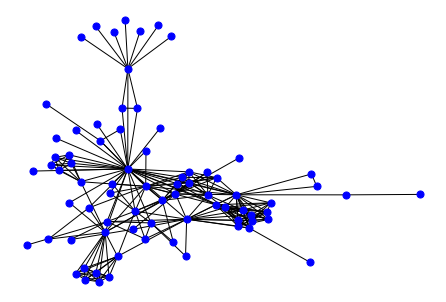

In [3]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Let us verify the number of nodes and edges of the network.

In [4]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


Now, let us calculate measures to characterize the network structure.

## Degree related measures

Since the degree() function from Networkx provides an iterator for (node, degree) , we will use only the values of the degree and ignore the label of the nodes. We also convert the list to a numpy array, since this structure is easier to be manipuled than other structures. 

In [5]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Degree: [ 1 10  3  3  1  1  1  1  1  1 36  1  2  1  1  1 15 11 16 11 17  4  8  4
  1  2  6  6  6  6  6  3  2 22  7  7 19 15 13 10 10 10  9  3  7  9  7  7
  7  7  7  2 11  3  2  3  1  7  4  1  2 11 13  2  1 11  9 11 12 12 10  2
  2  7  2  1  1]


The mean degree of the network:

In [7]:
md = np.mean(vk)
print('Mean degree: ', md)

Mean degree:  6.597402597402597


From the node degrees, we can calculate several statistical measures. Let us develop a function to calculate the degree distribution.

In [8]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

Thus, to obtain the degree distribution, we have:

In [9]:
ks, Pk = degree_distribution(G)

Thus, we can plot the degree distribution in log-log scale.

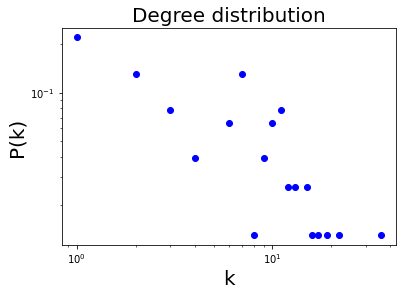

In [10]:
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

We can also calculate the statistical moments of the degree distribution. A function to calculate the m-th moment of the degree distribution is defined as:

In [11]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

Or, we can also calculate through:

In [12]:
def momment_of_degree_distribution2(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

The first statistical moment is equal to the mean degree:

In [14]:
k1 = momment_of_degree_distribution(G,1)
print("Mean degree = ", np.mean(vk))
print("First moment of the degree distribution = ", k1)

Mean degree =  6.597402597402597
First moment of the degree distribution =  6.597402597402597


And the second momment of the degree distribution:

In [15]:
k2 = momment_of_degree_distribution(G,2)
print("Second moment of the degree distribution = ", k2)

Second moment of the degree distribution =  79.53246753246754


The variance is calculated as: $V(k) = \langle k^2 \rangle -\langle k \rangle^2$

In [16]:
variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variance of the degree = ", variance)

Variance of the degree =  36.006746500252994


The level of network heterogeneity with respect to the number of connections can be quantified by the Shannon entropy. A function to calculate the Shannon entropy of the degree distribution can be defined as:

In [19]:
import math as math
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

The Shannon entropy of P(k)

In [20]:
H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  3.5957


## Clustering coefficient

The level of triangles in a network can also be quantified by the average clustering coefficient, calculated from the local clustering coefficient, i.e.,

In [24]:
avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

Average clustering: 0.5731


The clustering of each node is defined by the fraction of edges among the neighbors of each node.

In [25]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

Clustering of all nodes: [0.         0.06666667 1.         1.         0.         0.
 0.         0.         0.         0.         0.12063492 0.
 1.         0.         0.         0.         0.31428571 0.49090909
 0.40833333 0.38181818 0.32352941 0.33333333 0.64285714 0.66666667
 0.         1.         1.         1.         1.         1.
 1.         1.         1.         0.35497835 0.47619048 0.42857143
 0.33333333 0.60952381 0.76923077 0.8        0.8        0.71111111
 0.83333333 1.         1.         0.61111111 1.         1.
 1.         1.         1.         1.         0.45454545 1.
 0.         0.33333333 0.         0.9047619  1.         0.
 0.         0.69090909 0.75641026 0.         0.         0.92727273
 1.         0.92727273 0.86363636 0.86363636 0.93333333 1.
 1.         1.         1.         0.         0.        ]


The statistical distribution of the clustering coefficient:

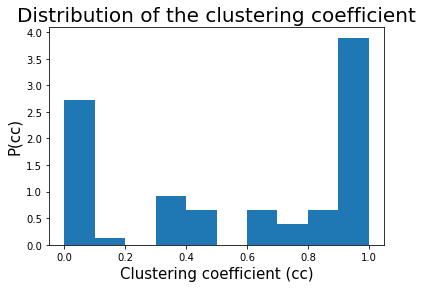

In [26]:
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

## Distance

In [29]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", "%3.4f"%l)
else:
    print("The graph has more than one connected component")

Average shortest path length: 2.6411


The shortest path with the longest length is the diameter.

In [30]:
d = nx.diameter(G)
print('Network diameter:', d)

Network diameter: 5


Another measure related to distances is the network efficiency, which is a measure of how efficiently are network exchanges information. The average global efficiency of a graph is the average efficiency of all pairs of nodes. The higher this measure, the better the information transmission in a network.

In [31]:
E = nx.global_efficiency(G)
print('Network efficiency', E)

Network efficiency 0.43528708133971505


## Centrality

The closeness centrality considers the average distance of a node to all other ones.

In [33]:
CLC = dict(nx.closeness_centrality(G))
print('Closeness centrality', CLC)

Closeness centrality {1: 0.30158730158730157, 2: 0.4293785310734463, 3: 0.41304347826086957, 4: 0.41304347826086957, 5: 0.30158730158730157, 6: 0.30158730158730157, 7: 0.30158730158730157, 8: 0.30158730158730157, 9: 0.30158730158730157, 10: 0.30158730158730157, 11: 0.6440677966101694, 12: 0.39378238341968913, 13: 0.41304347826086957, 14: 0.39378238341968913, 15: 0.39378238341968913, 16: 0.39378238341968913, 24: 0.46060606060606063, 25: 0.46060606060606063, 26: 0.5170068027210885, 27: 0.4779874213836478, 28: 0.5170068027210885, 29: 0.4021164021164021, 30: 0.42696629213483145, 32: 0.4175824175824176, 33: 0.39378238341968913, 34: 0.3958333333333333, 35: 0.40425531914893614, 36: 0.40425531914893614, 37: 0.40425531914893614, 38: 0.40425531914893614, 39: 0.40425531914893614, 44: 0.4021164021164021, 45: 0.39790575916230364, 49: 0.5135135135135135, 50: 0.4418604651162791, 52: 0.4418604651162791, 56: 0.5314685314685315, 59: 0.4810126582278481, 65: 0.475, 69: 0.4634146341463415, 70: 0.4634146341

The average closeness cenrality of the network:

In [35]:
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print('Average closeness centrality', av_clc)

Average closeness centrality 0.3893412505666164


The distribution of the closeness centrality.

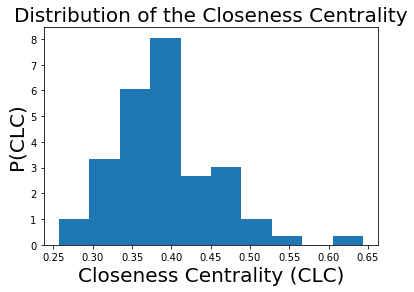

In [36]:
plt.figure(figsize=(6,4))
plt.hist(CLC, density=True)
plt.title("Distribution of the Closeness Centrality", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.savefig('closeness.eps')
plt.show(True)

Another measure related to distances is the betweeness centrality, which measure the load in each node. Thus, the larger the betweenness centrality, the more central is a node.

In [37]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(G))
print('Betweeness centrality:', B)

Betweeness centrality: {1: 0.0, 2: 0.17684210526315788, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.5699890527836186, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 24: 0.12964454098819425, 25: 0.02900241873046176, 26: 0.07490122123424227, 27: 0.023796253454148184, 28: 0.05433155966478437, 29: 0.026491228070175437, 30: 0.008040935672514618, 32: 0.008640295033483887, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 44: 0.0, 45: 0.0, 49: 0.1651125024258477, 50: 0.020210621583197756, 52: 0.047598927875243655, 56: 0.132032488621946, 59: 0.0425533568221771, 65: 0.030753650179957816, 69: 0.004960383978389518, 70: 0.004960383978389518, 71: 0.0048618041955992095, 72: 0.0038738298738298736, 73: 0.0, 17: 0.0, 18: 0.04062934817733579, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 31: 0.0, 42: 0.011487550654163002, 43: 0.0, 51: 0.00021720969089390142, 40: 0.006925438596491229, 41: 0.0, 76: 0.00043859649122807013, 55: 0.0, 46: 0.0, 53: 0.0003508771929824561, 58

The average betweenness centrality of the network:

In [38]:
B = list(B.values())
av_B = np.mean(B)
print('Average betweenness centrality', av_B)

Average betweenness centrality 0.021881977671451357


And the distribution of the betweeness centrality:

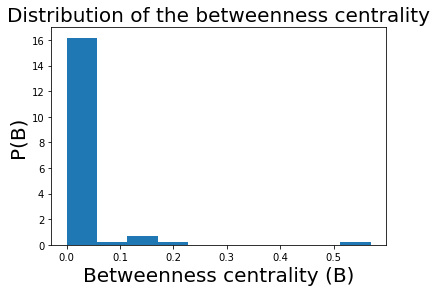

In [39]:
plt.figure(figsize=(6,4))
plt.hist(B, density=True)
plt.title("Distribution of the betweenness centrality", fontsize=20)
plt.ylabel("P(B)", fontsize=20)
plt.xlabel("Betweenness centrality (B)", fontsize=20)
plt.savefig('betweenness.eps')
plt.show(True)

Another measure related to distances is the betweeness centrality, which measure the load in each node. Thus, the larger the betweenness centrality, the more central is a node.

In [41]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(G))
print('Betweeness centrality:', B)

Betweeness centrality: {1: 0.0, 2: 0.17684210526315788, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.5699890527836186, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 24: 0.12964454098819425, 25: 0.02900241873046176, 26: 0.07490122123424227, 27: 0.023796253454148184, 28: 0.05433155966478437, 29: 0.026491228070175437, 30: 0.008040935672514618, 32: 0.008640295033483887, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 44: 0.0, 45: 0.0, 49: 0.1651125024258477, 50: 0.020210621583197756, 52: 0.047598927875243655, 56: 0.132032488621946, 59: 0.0425533568221771, 65: 0.030753650179957816, 69: 0.004960383978389518, 70: 0.004960383978389518, 71: 0.0048618041955992095, 72: 0.0038738298738298736, 73: 0.0, 17: 0.0, 18: 0.04062934817733579, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 31: 0.0, 42: 0.011487550654163002, 43: 0.0, 51: 0.00021720969089390142, 40: 0.006925438596491229, 41: 0.0, 76: 0.00043859649122807013, 55: 0.0, 46: 0.0, 53: 0.0003508771929824561, 58

The average betweenness centrality of the network:

In [42]:
B = list(B.values())
av_B = np.mean(B)
print('Average betweenness centrality', av_B)

Average betweenness centrality 0.021881977671451357


And the distribution of the betweeness centrality:

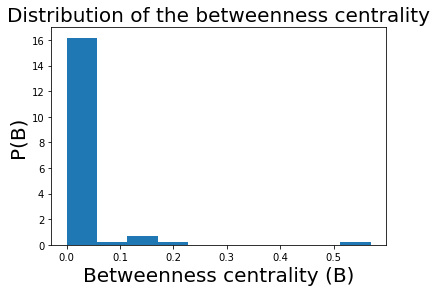

In [43]:
plt.figure(figsize=(6,4))
plt.hist(B, density=True)
plt.title("Distribution of the betweenness centrality", fontsize=20)
plt.ylabel("P(B)", fontsize=20)
plt.xlabel("Betweenness centrality (B)", fontsize=20)
plt.savefig('betweenness.eps')
plt.show(True)

The eigenvector centrality.

In [44]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {1: 0.0023434559950116173, 2: 0.028134336026755365, 3: 0.026872999836996418, 4: 0.026872999836996418, 5: 0.0023434559950116173, 6: 0.0023434559950116173, 7: 0.0023434559950116173, 8: 0.0023434559950116173, 9: 0.0023434559950116173, 10: 0.0023434559950116173, 11: 0.26761817598853926, 12: 0.022291152877501864, 13: 0.029767714740768846, 14: 0.022291152877501864, 15: 0.022291152877501864, 16: 0.022291152877501864, 24: 0.08975922949834113, 25: 0.12228242172143362, 26: 0.1878077051550094, 27: 0.11103702398134034, 28: 0.184225163210257, 29: 0.04004860673568995, 30: 0.06227506194694945, 32: 0.046055011005835665, 33: 0.022291152877501864, 34: 0.03763613953656061, 35: 0.04120828302958653, 36: 0.04120828302958653, 37: 0.04120828302958653, 38: 0.04120828302958653, 39: 0.04120828302958653, 44: 0.046884942434314236, 45: 0.025627007259539696, 49: 0.31783893977497674, 50: 0.06539729702430212, 52: 0.063169051443388, 56: 0.2591111453417876, 59: 0.26717863282356663, 65: 0.242130786

The average eigenvector centrality of the network:

In [45]:
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.07802991544392937


The histogram of the eigenvector centrality:

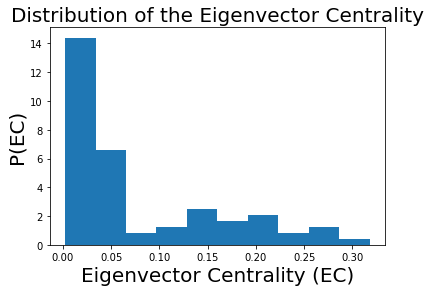

In [46]:
plt.figure(figsize=(6,4))
plt.hist(EC, density=True)
plt.title("Distribution of the Eigenvector Centrality",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.savefig('eigenvector.eps')
plt.show(True)

The PageRank is related to random walks in networks and can be calculated by Networkx too.

In [47]:
# Page-rank
PR = dict(nx.pagerank(G, alpha=0.85))
print("PageRank: ", PR)

PageRank:  {1: 0.005584422032875157, 2: 0.042803439760757324, 3: 0.010278692012006995, 4: 0.010278692012006995, 5: 0.005584422032875157, 6: 0.005584422032875157, 7: 0.005584422032875157, 8: 0.005584422032875157, 9: 0.005584422032875157, 10: 0.005584422032875157, 11: 0.07543374445332471, 12: 0.003729207724475982, 13: 0.005260475964681427, 14: 0.003729207724475982, 15: 0.003729207724475982, 16: 0.003729207724475982, 24: 0.027022474221419405, 25: 0.01950085621956518, 26: 0.027925725316528024, 27: 0.020610995118411402, 28: 0.030302597127170365, 29: 0.011638461518918631, 30: 0.015577339721833325, 32: 0.009073808390995954, 33: 0.003729207724475982, 34: 0.0052443431851455745, 35: 0.012425709931967177, 36: 0.012425709931967177, 37: 0.012425709931967174, 38: 0.012425709931967174, 39: 0.012425709931967174, 44: 0.006837007621558543, 45: 0.006202388346594249, 49: 0.03576412343161934, 50: 0.014957273550762798, 52: 0.01626002713866331, 56: 0.030892701920406468, 59: 0.021879692835635844, 65: 0.018957

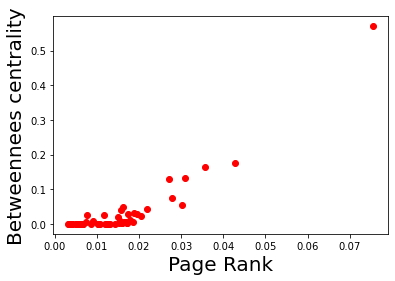

In [48]:
PR = dict(nx.pagerank(G, alpha=0.85))
PR = list(PR.values())
PR = np.array(PR)

B = dict(nx.betweenness_centrality(G))
B = list(B.values())
B = np.array(B)
plt.figure(figsize=(6,4))
plt.ylabel("Betweennees centrality", fontsize = 20)
plt.xlabel("Page Rank", fontsize = 20)
plt.plot(PR, B, 'ro')
plt.show(True)

The average PageRank:

In [49]:
PR = dict(nx.pagerank(G, alpha=0.85))
PR = list(PR.values())
av_pr = np.mean(PR)
print('Average PageRank', av_pr)

Average PageRank 0.012987012987012988


The distribution of the PageRank measure:

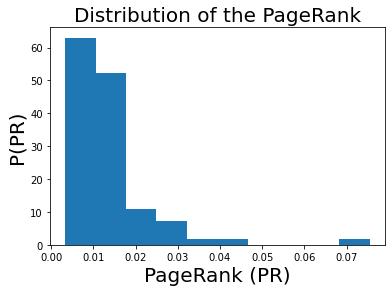

In [50]:
plt.figure(figsize=(6,4))
plt.hist(PR, density=True)
plt.title("Distribution of the PageRank", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)
plt.savefig('pagerank.eps')
plt.show(True)

## Community identification

Let us study some methods for community identification. We consider only methods provided by the Networkx library, althoug there are many methods in the literature and some executable softwares (see https://arxiv.org/abs/1608.00163).

The Girvan-Newman method is based on the edge betweeneess centrality measure.

Applying the method in the Zachary karate club network.

In [51]:
#Girvan-Newman method (betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in range(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)

community: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 22]
community: [2, 8, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


Plotting the communities with different colors.

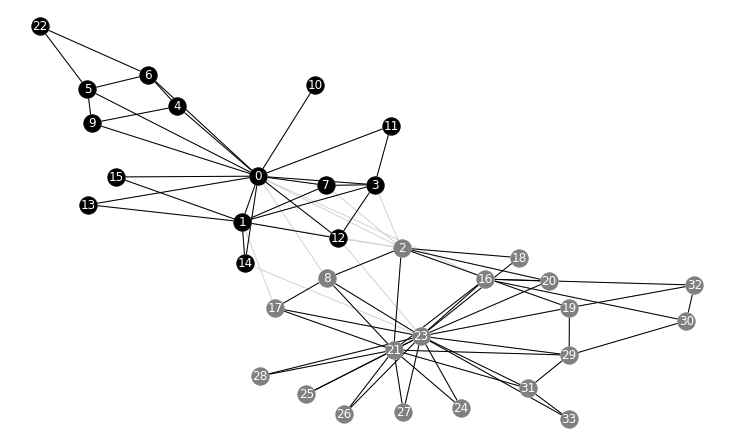

In [52]:
colors = ['black', 'gray', 'green', 'c', 'm', 'y', 'w']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray')
aux = 0
for cm in c:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Zachary.eps') #save the figure into a file
plt.show(True)